In [1]:
"""Data inspection."""

'Data inspection.'

In [5]:
import importlib
import os

import matplotlib
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

import analyze
importlib.reload(analyze)
import datasets
importlib.reload(datasets)
import vis
importlib.reload(vis)

DATA_DIR = '/neuro/'
DATA_TYPE = 'conn'

IMG_SHAPE = (15, 15)
SHAPE_STR = datasets.get_shape_string(IMG_SHAPE)
TRAIN_DATASET_PATH = os.path.join(
    DATA_DIR, 'train_val_datasets/%s_%s_%s.npy' % (
        'train', DATA_TYPE, SHAPE_STR))
VAL_DATASET_PATH = os.path.join(
    DATA_DIR, 'train_val_datasets/%s_%s_%s.npy' % (
        'val', DATA_TYPE, SHAPE_STR))

DATASET_PATH = TRAIN_DATASET_PATH
DATASET = np.load(DATASET_PATH)

OUTPUT = '/scratch/users/nmiolane/imoutput_connectomes'
CMAP = 'Spectral'

From: https://www.humanconnectome.org/storage/app/media/documentation/s1200/HCP_S1200_Release_Reference_Manual.pdf

1. netmats1: Using "full" normalized temporal correlation between every node timeseries
and every other. This is a common approach and is very simple, but it has various
practical and interpretational disadvantages [Smith 2012].
2. netmats2: Using partial temporal correlation between nodes' timeseries. This aims to
estimate direct connection strengths better than achieved by full correlation. To slightly
improve the estimates of partial correlation coefficients, a small amount of L2
regularization is applied (setting rho=0.01 in the Ridge Regression netmats option in
FSLNets) [Smith OHBM 2014, FSLNets]. 

In [6]:
import numpy as np
from geomstats.spd_matrices_space import SPDMatricesSpace

spd_space = SPDMatricesSpace(n=15)
spd_mat_a = spd_space.random_uniform()
spd_mat_b = spd_space.random_uniform()
spd_mat_c = spd_space.random_uniform()

In [7]:
vec_ab = spd_space.metric.log(base_point=spd_mat_a, point=spd_mat_b)
geod_ab = spd_space.metric.geodesic(initial_point=spd_mat_a, initial_tangent_vec=vec_ab)
points_ab = geod_ab(np.arange(0, 1, 0.0002))

vec_bc = spd_space.metric.log(base_point=spd_mat_b, point=spd_mat_c)
geod_bc = spd_space.metric.geodesic(initial_point=spd_mat_b, initial_tangent_vec=vec_bc)
points_bc = geod_ab(np.arange(0, 1, 0.0002))

vec_ca = spd_space.metric.log(base_point=spd_mat_c, point=spd_mat_a)
geod_ca = spd_space.metric.geodesic(initial_point=spd_mat_c, initial_tangent_vec=vec_ca)
points_ca = geod_ab(np.arange(0, 1, 0.0002))

point
(1, 15, 15)
base_point
(1, 15, 15)
sqrt_base_point
(1, 15, 15)
sqrt_base_point
[[[ 1.52806052e+00  5.42495899e-01  2.18330359e-01 -8.09943538e-01
   -4.65488688e-01  5.48345048e-01  3.89081063e-01  2.65859657e-01
   -9.50480669e-01  7.05490431e-01 -6.93002256e-01 -5.12011153e-01
    3.99147887e-01  3.12821417e-03 -2.89077011e-01]
  [ 5.42495899e-01  2.56672488e+00  6.22119804e-02 -6.45193522e-01
    7.02771764e-01 -1.50721133e+00  7.01522091e-01  8.61978187e-01
   -8.92564161e-01  1.20840205e-01  3.21237255e-01 -9.79258144e-01
    4.69975886e-01  6.41687412e-01  4.62575714e-01]
  [ 2.18330359e-01  6.22119804e-02  4.04805348e+00  1.91755969e+00
    6.41888214e-02 -1.17606217e-01 -3.95516364e-01 -8.24366636e-01
   -2.37928281e-01 -1.31832679e-01  6.95207884e-01 -9.45274544e-01
    2.04457374e-01 -2.28495059e-01  1.39314096e-01]
  [-8.09943538e-01 -6.45193522e-01  1.91755969e+00  3.99410687e+00
    3.37675156e-02 -5.64459491e-01 -1.75002132e+00 -1.45674504e+00
   -1.32211195e+00 -1.

In [9]:
datasets.is_spd(points_ab)
datasets.is_spd(points_bc)
datasets.is_spd(points_ca)

In [22]:
print(points_ab.shape)
print(points_bc.shape)
print(points_ca.shape)

(5000, 15, 15)
(5000, 15, 15)
(5000, 15, 15)


In [23]:
dataset = np.concatenate([points_ab, points_bc, points_ca], axis=0)
print(dataset.shape)

(15000, 15, 15)


In [24]:
np.random.shuffle(dataset)
print(dataset.shape)

(15000, 15, 15)


In [25]:
np.save('/neuro/train_val_datasets/train_conn_simu_15x15.npy', dataset[:12000])
np.save('/neuro/train_val_datasets/val_conn_simu_15x15.npy', dataset[12000:])

In [94]:
dataset, _ = datasets.get_dataset_connectomes((15, 15))

Loading /neuro/train_val_datasets/train_conn_15x15.npy...
Loading /neuro/train_val_datasets/val_conn_15x15.npy...


In [95]:
print(dataset.shape)
print(np.min(dataset))
print(np.max(dataset))

(649, 1, 15, 15)
2.3284999932667082e-05
1.0


In [9]:
CORR_THRESH = 0.1

bools = np.zeros(len(dataset))
for i, mat in enumerate(dataset):
    #print(i)
    mat = mat[0]
    val, _ = np.linalg.eig(mat)
    bools[i] = min(val)

In [10]:
min(bools)

0.24174864303448396

In [67]:
np.tile(np.eye(2, 2), (3, 1, 1))

array([[[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]]])

In [3]:
print(DATASET.shape)
print(np.min(DATASET))
print(np.max(DATASET))

(649, 1, 15, 15)
2.3284999932667082e-05
1.0


In [96]:
import toylosses
import torch
DATASET = dataset
print(DATASET.shape)
toylosses.is_spd(torch.Tensor(DATASET[0, 0]))

(649, 1, 15, 15)


Loading /neuro/train_val_datasets/train_conn_15x15.npy
Dataset shape: (771, 1, 15, 15)


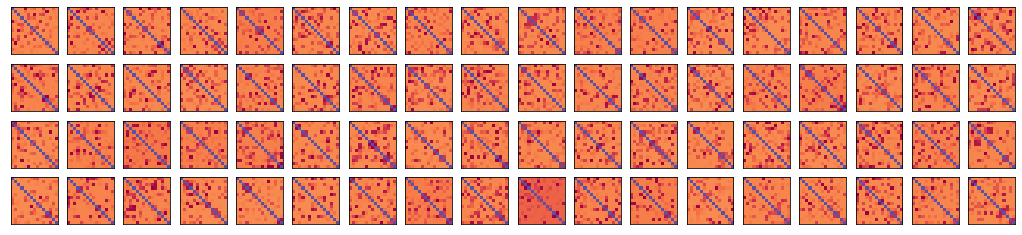

In [110]:
vis.show_data(DATASET_PATH, cmap=CMAP)

Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/train_vae/epoch_153_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/train_vae/epoch_153_checkpoint.pth.


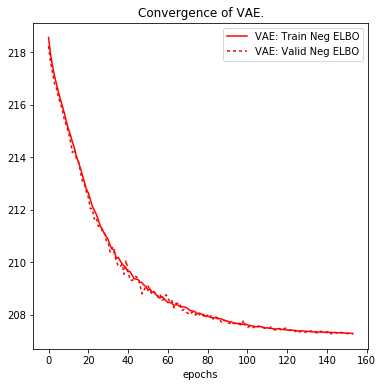

In [127]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

ax = vis.plot_convergence(ax, OUTPUT, algo_name='vae', crit_name='neg_elbo')

Loading /neuro/train_val_datasets/train_conn_15x15.npy
Dataset shape: (771, 1, 15, 15)
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/train_vae/epoch_80_checkpoint.pth.
Loading encoder from network of architecture: linear...
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/train_vae/epoch_80_checkpoint.pth.
Loading decoder from network of architecture: linear...


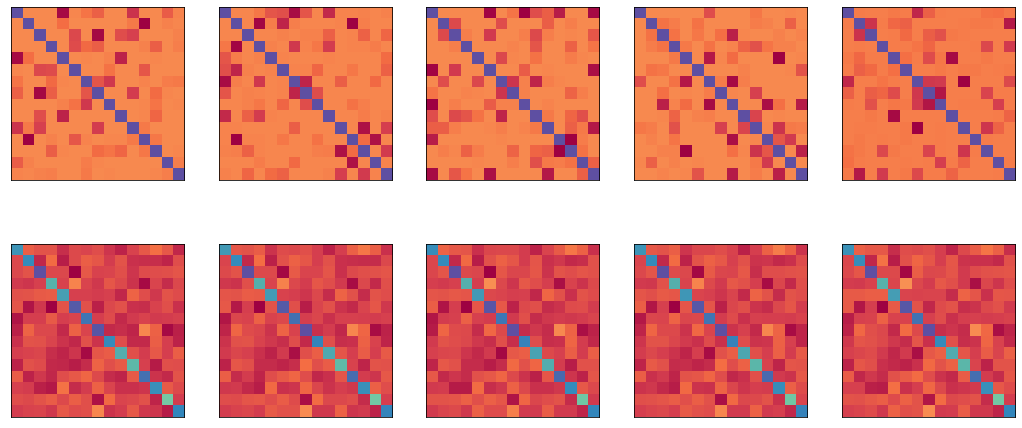

In [130]:
vis.show_img_and_recon(OUTPUT, DATASET_PATH, cmap=CMAP, epoch_id=80)

Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/train_vae/epoch_80_checkpoint.pth.
Loading decoder from network of architecture: linear...


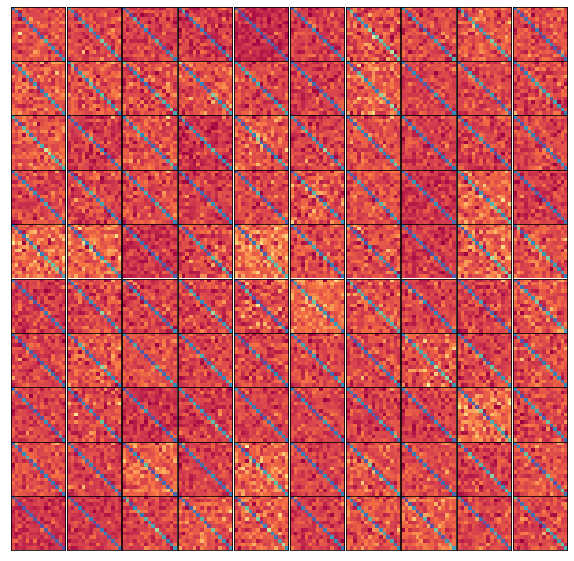

In [131]:
fig = plt.figure(figsize=(10, 10))
outer = gridspec.GridSpec(1, 1, wspace=0.1, hspace=0.1)

for i, algo_name in enumerate(['vae']):
    vis.show_samples_from_prior(
        OUTPUT, fig, outer, i, algo_name=algo_name, cmap=CMAP, epoch_id=80)
fig.show()

Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/train_vae/epoch_24_checkpoint.pth.
Loading encoder from network of architecture: conv...


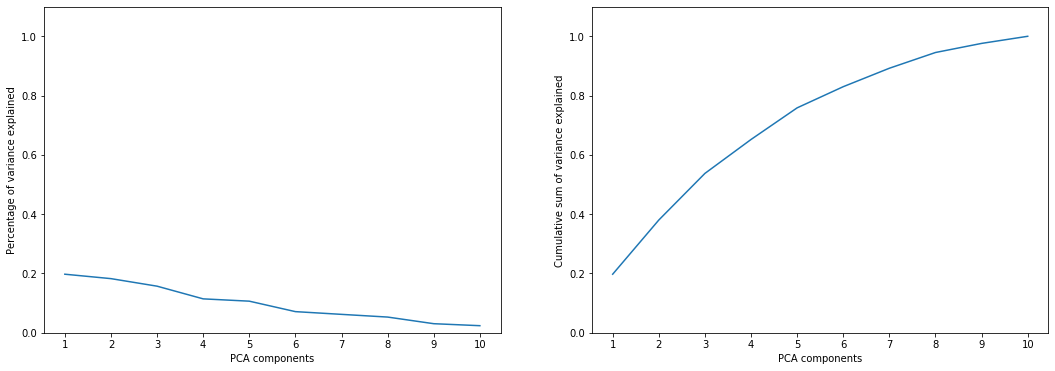

In [69]:
ax = vis.plot_variance_explained(OUTPUT, DATASET_PATH)

Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/train_vae/epoch_24_checkpoint.pth.
Loading encoder from network of architecture: conv...


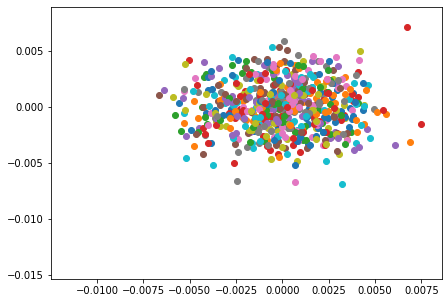

In [42]:
n_pcs = 2

mus = analyze.latent_projection(output=OUTPUT, dataset_path=DATASET_PATH)
_, projected_mus = analyze.pca_projection(mus, n_pcs)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

for mu in projected_mus:
    if n_pcs == 2:
        im = ax.scatter(mu[0], mu[1]) 
    else:
        im = ax.scatter(mu[0], mu[1], mu[2])